#  <center><u>**`K NEAREST NEIGHBHOUR`**</u></center>

Using the Social network ad dataset (Download). The dataset contains the details of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on their salary, age, and gender.

Use Case: To find whether a user buys a product by clicking the ad

Data Dict

1. User ID : The ID of the user 
2. Gender: male or female
3. 3Age: The age of the user 
4. EstimatedSalary: The estimate salary of the user
5. Purchased:if Purchase made by a user.

In [3]:
#Importing of the dataset 

dataset = pd.read_csv('Social_Network_Ads.csv')


#Print variable information on  dataset

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# slicing it into independent and dependent variables
X = dataset.iloc[:,[1,2,3]].values
    

y = dataset.iloc[:,-1].values



Since the dataset contains character variables, have to encode it using LabelEncoder


In [7]:
# import LabelEncoder


from sklearn.preprocessing import LabelEncoder
#Instantiate LabelEncoder function
le = LabelEncoder()


#fit and encode the feature which is of object type 
 
X[:,0]=le.fit_transform(X[:,0])

We are performing a train test split on the dataset. We are providing the test size as 0.20, that means our training sample contains 320 training set and test sample contains 80 test set

In [8]:
# importing train_test_split
from sklearn.model_selection import train_test_split


#Splitting into train and test data
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=0)

Next, we are doing feature scaling to the training and test set of independent variables for reducing the size to smaller values


In [9]:
# import StandardScaler 
from sklearn.preprocessing import StandardScaler

#Instantiate StandardScaler
sc = StandardScaler()

#fit transform sc on X_train
X_train = sc.fit_transform(X_train)

#Transform scaling on X_test
X_test = sc.transform(X_test)

Now we have to create and train the K Nearest Neighbor model with the training set


In [10]:
#Instantiate KNeighborsClassifier with n_neighbors as 5,  metric as 'minkowski' and p as 2
classifier = neighbors.KNeighborsClassifier(  n_neighbors=5,
    p=2,
    metric='minkowski',)

#fitting classifier on training data

classifier.fit(X_train,y_train)


KNeighborsClassifier()

We are using 3 parameters in the model creation. n_neighbors is setting as 5, which means 5 neighborhood points are required for classifying a given point.
 
    p = 1 , Manhattan Distance
    p = 2 , Euclidean Distance
    p = infinity , Cheybchev Distance
In our problem, we are choosing the p as 2 (also  can choose the metric as “euclidean”)
Our Model is created, now we have to predict the output for the test set
 

In [11]:
#prediction on X_test 
y_pred = classifier.predict(X_test)


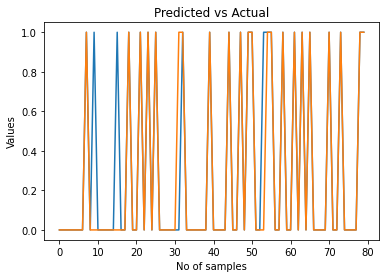

In [12]:
# Comparing true and predicted value using plot

plt.plot(y_pred)
plt.plot(y_test)
plt.title('Predicted vs Actual')
plt.xlabel('No of samples')
plt.ylabel('Values')
plt.show()




We can evaluate our model using the confusion matrix and accuracy score by comparing the predicted and actual test values



In [14]:
# import confusion_matrix and accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score

#confusion_matrix
cm = confusion_matrix(y_pred,y_test)

    #accuracy_score
ac = accuracy_score(y_pred,y_test)


# print accuracy_score and confusion_matrix

print(ac)
print(cm)



0.95
[[55  1]
 [ 3 21]]


Our model seems performing really good with 95% accuracy





In [16]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1,26)


# empty list to append scores
scores = []

# loop through k_range
for k in k_range:
    
    #Initiate KNN with n_neighbors as k
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    #Fitting model on training data

    knn.fit(X_train,y_train)
    
    
    #Predict on X_test
    y_pred = knn.predict(X_test)
    
    # We append the scores in the dictionary in list
    scores.append(metrics.accuracy_score(y_test,y_pred))

    
#print scores

print(scores)

[0.925, 0.925, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.925, 0.9375]


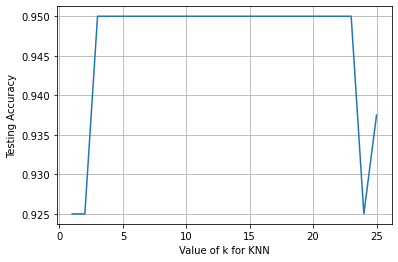

In [18]:
# plot the relationship between K and testing accuracy

plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()
plt.show()



    For KNN models, complexity is determined by the value of K (lower value = more complex)
    
From above chart we can see that k value after 5 increases the accuracy and same accuracy is maintained till k=13. So our selected k value 5 is perfect to solve our problem

